In [331]:
import math

In [332]:
import pdb

In [333]:
# we need to make a function that domputes the distance between the two points based on the x and the y coordinates
def euc_dist(x_1,y_1,x_2,y_2):
    import math
    value=math.sqrt((x_1-x_2)**2+(y_1-y_2)**2)
    result=round(value)
    return result

In [334]:
distance=euc_dist(1,1,1,2)

print("distance:{}".format(distance))

distance:1


In [335]:
def nearest_neighbour_path(nodes,paths):
    print("="*50)
    print("running insertion neighbours method.......\n")
    while len(nodes)!=0:# do this when lines are not zero
        val=random.randint(0,len(nodes)-1)#pick a random node to be removed takes value inc upper bound hence -1
        node=nodes.pop(val) #take out that val in the nodes and save it as the node 
        metric=(node[0],node[1],node[2])# creates metric (city_name , x_c, y_c)
    
        if(len(paths)<=1):#at first paths is an empty list insert first two elements random
        
            dist=0 #for empty list dist is zero with prev element 
            paths.append(metric)#add this metric to the empty list
    
        else:#if the list is not empty ,meaning we have some elements before
            #we will compare distance of this element with all the prev elements
        
            distances=[] #an empty list with with distances 
        
            for elements in paths: 
                dist=euc_dist(node[1],node[2],elements[1],elements[2])
                distances.append((elements[0],dist))
            
            print("already in paths: {}\n".format(paths))
            print("the distances of pt {} are as follows:{}\n".format(node,distances))
        
            from operator import itemgetter # run a sort based on distances stored in tuple
            distances.sort(key=itemgetter(1))
        
            print("the min distance value is : {}\n".format(distances[0])) #this is the min distance point
        
            ###find the index of the min distance in the node and insert it
            index_check=distances[0][0] #this is the city after which it should be inserted
        
            for numbers in paths: #look for that same element in the paths 
                if(index_check==numbers[0]): #if index matches then
                    index=paths.index(numbers)#this is the index of the path node closest to the slected node
                    print("found the index {}\n".format(index))
                    paths.insert(index+1,node) #put this element at index +1 pos and move everything right
                    break
                    
                    
    print("paths are :{}\n".format(paths))
        
    #print(paths) #print the updated path
    first_ele=paths[0]

    print("we also need to return back to first city , don't forget that, first element which is :{}".format(first_ele))
    if (paths[0]!=paths[-1]):
        paths.append(first_ele)
    print("="*50)
    
    return paths




        

In [336]:
def overall_cost(paths):
    """given a list it iterates through it and propogates through all nodes and calc distances"""
    total=0
    for i in range(len(paths)):
        try:
            dist=euc_dist(paths[i][1],paths[i][2],paths[i+1][1],paths[i+1][2])
            #print(dist)
        except:
            break
        total+=dist
    return total

In [337]:
def pick_nearest_start(nodes):
    print("="*50)
    paths=[]
    cost=0
    print("\nthis is the begining >>>>")
    print("\nthese are the nodes lot:{}".format(nodes))
    print("\nthese are the paths lot:{}".format(paths))
    while nodes!=0: #as soon as nodes is empty >>>stop
        if(len(paths)==0 and len(nodes)>0):#its start 
            val=random.randint(0,len(nodes)-1)
            element_removed=nodes.pop(val)
            paths.append(element_removed)
            dist=0
            cost+=dist
        elif(len(paths)!=0 and len(nodes)==0):#termination stage
            #just add the first term back again
            paths.append(paths[0])
            dist=euc_dist(paths[-1][1],paths[-1][2],paths[-2][1],paths[-2][2])
            cost+=dist
            break
            
        else: #if length is not equal to 0 then there exists some city in the path alredy
            dist=[] # compare the distance of this element present in path already with all the elements in the nodes
            last_node=paths[-1]
            
            for elements in nodes:
                d=euc_dist(last_node[1],last_node[2],elements[1],elements[2])
                dist.append((elements[0],d)) #makes a d list with (city name , distance with the removed node )
                
            from operator import itemgetter # run a sort based on distances stored in tuple
            dist.sort(key=itemgetter(1))
            
            index_check=dist[0][0] #this is the city after which it should be inserted
            dist = dist[0][1]
            
            cost+=dist
            
            found= [item for item in nodes if (item[0] == index_check)]#search the index of closest node in nodes
            nodes.remove(found[0])#only select the city name and stack it with paths
            paths.append(found[0])
            
            del dist
            
    print("="*50)
    return paths, dist
            
        

In [338]:
#parse out the values in a new folder in the directory called results and save cost and paths
def parse_out(output_name, paths,cost): #takes file name and nodes
    first_line=str(cost)+"\n"
    file = open(output_name, "w") 
    file.write(first_line) 
    file.write("\n")
    for elements in paths :
        city=elements[0]
        city=str(city)
        file.write(city)
        file.write("\n")
    file.close() 
    pass

# optional block 

In [339]:
#proof that the pdf is wrong with examples
pdf_paths=[(1, 823170, 415922), (2, 793699, 274913),(3, 981665, 218777),(4, 878910, 431320),(1, 823170, 415922)]
pdf_cost=overall_cost(pdf_paths)
print("total cost value is: {}".format(pdf_cost))

total cost value is: 634132


# This is the main block- alg 1

In [340]:
#navigating to the problem files
import os
path="/Users/mv96/Desktop/cit/first semester/meta heuristics optimization/TSP dataset"
os.chdir(path)
fhand=open("inst-4.tsp")
print("name of the file is :",fhand.name)
nodes_count=fhand.readline()# read first line it shows the number of nodes in the problem  
nodes=fhand.readlines()#
import random
paths=[]
i=0
nodes_tuples=[]
for elements in nodes:
    elements=elements.strip()
    elements=elements.split(" ")
    elements[0]=int(elements[0])
    elements[1]=int(elements[1])
    elements[2]=int(elements[2])
    elements=tuple(elements)
    nodes_tuples.append(elements)
nodes=nodes_tuples

name of the file is : inst-4.tsp


In [341]:
import time
tic_1=time.time()
paths_1=nearest_neighbour_path(nodes,paths)
print("paths:{}".format(paths_1))
print("final path values are:{}".format(paths_1)) #even if we have same elements twice its cost will not change 
cost_1=overall_cost(paths_1)
print("\ntotal cost value is:{}".format(cost_1))
toc_1=time.time()
test_1=toc_1-tic_1


running insertion neighbours method.......

already in paths: [(53, 784890, 410170), (72, 863773, 535941)]

the distances of pt (43, 778445, 442510) are as follows:[(53, 32976), (72, 126531)]

the min distance value is : (53, 32976)

found the index 0

already in paths: [(53, 784890, 410170), (43, 778445, 442510), (72, 863773, 535941)]

the distances of pt (119, 817204, 375853) are as follows:[(53, 47137), (43, 77107), (72, 166724)]

the min distance value is : (53, 47137)

found the index 0

already in paths: [(53, 784890, 410170), (119, 817204, 375853), (43, 778445, 442510), (72, 863773, 535941)]

the distances of pt (40, 964571, 293139) are as follows:[(53, 214433), (119, 168993), (43, 238652), (72, 262894)]

the min distance value is : (119, 168993)

found the index 1

already in paths: [(53, 784890, 410170), (119, 817204, 375853), (40, 964571, 293139), (43, 778445, 442510), (72, 863773, 535941)]

the distances of pt (187, 775532, 504019) are as follows:[(53, 94314), (119, 134770),

In [342]:
#second algorithm that picks up every node at random and picks the next element based on the lowest dist

In [343]:
#navigating to the problem files
import os
path="/Users/mv96/Desktop/cit/first semester/meta heuristics optimization/TSP dataset"
os.chdir(path)
fhand=open("inst-4.tsp")
print("name of the file is :",fhand.name)
nodes_count=fhand.readline()# read first line it shows the number of nodes in the problem  
nodes=fhand.readlines()#
import random
i=0
nodes_tuples=[]

for elements in nodes:
    elements=elements.strip()
    elements=elements.split(" ")
    elements[0]=int(elements[0])
    elements[1]=int(elements[1])
    elements[2]=int(elements[2])
    elements=tuple(elements)
    nodes_tuples.append(elements)
    
nodes=nodes_tuples

name of the file is : inst-4.tsp


In [344]:
#run above block if it does not run
import time
tic=time.time()
paths_2, cost_2=pick_nearest_start(nodes)
#print("\nthe path is :{}".format(paths_2))
print("the cost is ",cost_2)
toc=time.time()
test_2=toc-tic


this is the begining >>>>

these are the nodes lot:[(1, 897320, 510790), (2, 811604, 577293), (3, 768512, 413407), (4, 901912, 445388), (5, 902298, 492666), (6, 832724, 501717), (7, 898324, 408832), (8, 824403, 445358), (9, 790634, 459107), (10, 806896, 329673), (11, 779169, 433942), (12, 886109, 548944), (13, 969264, 477639), (14, 715273, 432736), (15, 793595, 376803), (16, 935644, 425704), (17, 799510, 513681), (18, 889774, 520364), (19, 904798, 588117), (20, 837122, 378811), (21, 809608, 329667), (22, 752410, 482630), (23, 985433, 382242), (24, 880413, 564802), (25, 891112, 385082), (26, 936944, 440247), (27, 821343, 406644), (28, 864029, 688837), (29, 799663, 344948), (30, 772584, 556013), (31, 862585, 391598), (32, 774782, 442715), (33, 804374, 373087), (34, 918988, 446036), (35, 843617, 432706), (36, 857963, 430721), (37, 779340, 592153), (38, 849315, 423192), (39, 925054, 529791), (40, 964571, 293139), (41, 768586, 444680), (42, 815560, 540789), (43, 778445, 442510), (44, 77051

In [345]:
print("\nrun time of the first algorithm is {} and cost :{}".format(test_1,cost_1))
print("\nrun time of the second algorithm is {} and cost :{}".format(test_2,cost_2))


run time of the first algorithm is 0.10299491882324219 and cost :5656317

run time of the second algorithm is 0.031986236572265625 and cost :142635


In [346]:
#if both paths are the same
if(paths_1==paths_2):
    print("yes")
else:
    print("no")

no


clearly we ran both the algorithms at the same time and the second algorithm is optimized and hence can be
used to increase performance such a way that the distance travelled is always better and min when compared to the first.



In [347]:
print(paths_2)

[(78, 785401, 569831), (30, 772584, 556013), (188, 764547, 555161), (153, 736006, 542593), (163, 692368, 545592), (170, 700499, 494184), (22, 752410, 482630), (123, 766601, 470120), (103, 775079, 488318), (44, 770512, 496774), (187, 775532, 504019), (68, 798145, 511869), (17, 799510, 513681), (177, 807847, 509829), (91, 824498, 526568), (126, 827805, 535964), (42, 815560, 540789), (162, 820279, 547845), (180, 801741, 542812), (2, 811604, 577293), (102, 824877, 586165), (190, 822185, 604147), (118, 844262, 604360), (57, 843567, 618276), (176, 814490, 627743), (37, 779340, 592153), (174, 852202, 573946), (121, 873216, 568349), (24, 880413, 564802), (46, 880517, 550059), (143, 882785, 547076), (12, 886109, 548944), (72, 863773, 535941), (104, 855148, 545715), (141, 854830, 520327), (45, 849507, 504625), (6, 832724, 501717), (87, 822768, 488831), (150, 827604, 485284), (100, 817630, 479621), (97, 820929, 469426), (133, 823722, 468072), (108, 821276, 464787), (89, 819855, 462493), (73, 8312

In [348]:
os.chdir(path)
os.chdir("..")
try:
    os.mkdir("results tsp")
except:
    pass
current=os.getcwd()
os.chdir(current+"/"+"results tsp")
parse_out("algorithm-1 slow", paths_1,cost_1)
parse_out("algorithm-2 fast", paths_2,cost_2)
#parse_out("alg_1",paths_1,cost_1)


In [349]:
import matplotlib.pyplot as plt

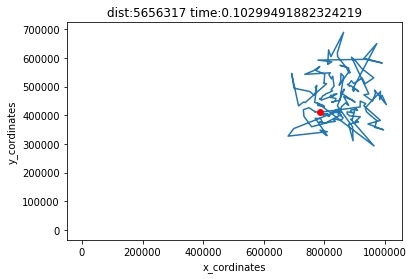

In [350]:
x_c=[] #x cordinates
y_c=[]#y cordiantes 
cities=[]#total number of cities
for elements in paths_1:
    x_c.append(elements[1])
    y_c.append(elements[2])
    cities.append(elements[0])
plt.plot(x_c,y_c)
plt.xlabel("x_cordinates")
plt.ylabel("y_cordinates")
plt.title("dist:"+str(cost_1)+" time:"+str(test_1))
#plt.plot(x_c,y_c,"go",170) #<<<<<<<<<<<<<you can add/remove this block for better visualization
plt.plot(x_c[0],y_c[0],"ro",170)

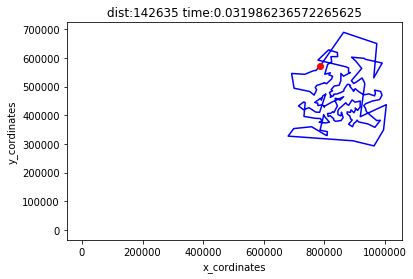

In [351]:
x_c=[]
y_c=[]
cities=[]
for elements in paths_2:
    x_c.append(elements[1])
    y_c.append(elements[2])
    cities.append(elements[0])
plt.xlabel("x_cordinates")
plt.ylabel("y_cordinates")
plt.title("dist:"+str(cost_2)+" time:"+str(test_2))        
plt.plot(x_c,y_c,"-b")
#plt.plot(x_c,y_c,"go",170)   #<<<<<<<<<<<<<you can add/remove this block for better visualization
plt.plot(x_c[0],y_c[0],"ro",170)

In [352]:
#try gif making with matplot lib